In [1]:
# Load libraries

library(TCGAbiolinks)
library(dplyr)
library(purrr)
library(DT)
library(SummarizedExperiment)
library(sesame)
library(sesameData)
library(janitor)
library(maftools)
library(survival)
library(survminer)

# Parallel processing
library(future.apply)
plan(multisession)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPer

In [2]:
# https://bioconductor.org/packages/release/bioc/vignettes/TCGAbiolinks/inst/doc/download_prepare.html
# Arguments
# GDCdownload
# GDCquery
# GDCprepare

In [3]:
print("Download the clinical data : for all patients")

# -------------------------------------------
# Step 1: Query and download BCR Biotab clinical data
# -------------------------------------------
query <- GDCquery(
  project = "TCGA-OV", 
  data.category = "Clinical",
  data.type = "Clinical Supplement", 
  data.format = "BCR Biotab"
)

GDCdownload(query)
clinical_tab_all <- GDCprepare(query)

# -------------------------------------------
# Step 2: Explore available clinical tables
# -------------------------------------------
cat("Clinical tables available in TCGA-OV Biotab:\n")
print(names(clinical_tab_all))

# -------------------------------------------
# Step 3: Extract tables of interest
# -------------------------------------------
clinical_patient <- clinical_tab_all[["clinical_patient_ov"]]
clinical_follow_up <- clinical_tab_all[["clinical_follow_up_v1.0_ov"]]

clinical_drug <- clinical_tab_all[["clinical_drug_ov"]]

clinical_radiation <- clinical_tab_all[["clinical_radiation_ov"]]
clinical_omf <- clinical_tab_all[["clinical_omf_v4.0_ov"]]

clinical_nte <- clinical_tab_all[["clinical_nte_ov"]]
clinical_follow_up2 <- clinical_tab_all[["clinical_follow_up_v1.0_ov"]]

# Clinical tables available in TCGA-OV Biotab:
# [1] * "clinical_patient_ov"            * "clinical_nte_ov"               
# [3] * "clinical_drug_ov"               * "clinical_follow_up_v1.0_ov"    
# [5] * "clinical_follow_up_v1.0_nte_ov" * "clinical_radiation_ov"         
# [7] * "clinical_omf_v4.0_ov"    

[1] "Download the clinical data : for all patients"


--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-OV

--------------------

oo Filtering results

--------------------

ooo By data.format

ooo By data.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases


ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------


Of the 7 files for download 7 already exist.

All samples have been already downloaded



  |======================================================================| 100%
Clinical tables available in TCGA-OV Biotab:
[1] "clinical_patient_ov"            "clinical_nte_ov"               
[3] "clinical_drug_ov"               "clinical_follow_up_v1.0_ov"    
[5] "clinical_follow_up_v1.0_nte_ov" "clinical_radiation_ov"         
[7] "clinical_omf_v4.0_ov"          


In [4]:
list.files()

[1] "age_distribution.png"                                                  
 [2] "age_group_distribution.png"                                            
 [3] "boxplot_PI4K2B_ENSG00000038210_14.png"                                 
 [4] "boxplot_PPP4R2_ENSG00000163605_15.png"                                 
 [5] "check_barcodes.r"                                                      
 [6] "check_columns.r"                                                       
 [7] "check_data_structure.r"                                                
 [8] "check_gene_ids.r"                                                      
 [9] "check_genes_final.r"                                                   
[10] "check_versions.r"                                                      
[11] "comprehensive_survival_analysis_fixed.r"                               
[12] "debug_structure.r"                                                     
[13] "explore_tcga_ov_clinical.r"                                            
[14] "expression_analysis.r"                                                 
[15] "extract_base_ids_fixed.r"                                              
[16] "extract_base_ids.r"                                                    
[17] "extract_cisplatin_data.r"                                              
[18] "extract_cisplatin_specific_fixed_v2.r"                                 
[19] "extract_cisplatin_specific_fixed.r"                                    
[20] "extract_cisplatin_specific.r"                                          
[21] "final_gene_check.r"                                                    
[22] "fix_duplicate_columns_simple.r"                                        
[23] "fix_rownames_check.r"                                                  
[24] "fixed_survival_analysis.r"                                             
[25] "GDCdata"                                                               
[26] "gender_distribution.png"                                               
[27] "histogram_PI4K2B_ENSG00000038210_14.png"                               
[28] "histogram_PPP4R2_ENSG00000163605_15.png"                               
[29] "improved_survival_analysis.r"                                          
[30] "MANIFEST.txt"                                                          
[31] "nationwidechildrens.org_clinical_drug_ov.Cisplatin.txt"                
[32] "nationwidechildrens.org_clinical_drug_ov.txt"                          
[33] "nationwidechildrens.org_clinical_follow_up_v1.0_nte_ov.txt"            
[34] "nationwidechildrens.org_clinical_follow_up_v1.0_ov.txt"                
[35] "nationwidechildrens.org_clinical_nte_ov.txt"                           
[36] "nationwidechildrens.org_clinical_omf_v4.0_ov.txt"                      
[37] "nationwidechildrens.org_clinical_patient_ov.txt"                       
[38] "nationwidechildrens.org_clinical_radiation_ov.txt"                     
[39] "OV_se.rds"                                                             
[40] "plot_specific_genes_fixed.r"                                           
[41] "plot_specific_genes_robust.r"                                          
[42] "plot_specific_genes.r"                                                 
[43] "quick_check.r"                                                         
[44] "quick_survival.r"                                                      
[45] "quick_view_tcga_ov.r"                                                  
[46] "real_survival_analysis.r"                                              
[47] "simple_check.r"                                                        
[48] "simple_final_check.r"                                                  
[49] "simple_gene_check.r"                                                   
[50] "simple_survival_analysis.r"                                            
[51] "standalone_survival.r"                                                 
[52] "string_match_chec

In [5]:
print("Survival Analysis")

[1] "Survival Analysis"


In [6]:
# Step 1: Query and download clinical data
query <- GDCquery(
  project = "TCGA-OV",
  data.category = "Clinical",
  data.type = "Clinical Supplement",
  data.format = "BCR Biotab",
  access = "open"
)
GDCdownload(query)
clinical_list <- GDCprepare(query)

# Step 2: Extract patient-level clinical data
clin.OV <- clinical_list$clinical_patient_OV

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-OV

--------------------

oo Filtering results

--------------------

ooo By access

ooo By data.format

ooo By data.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases


ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------


Of the 7 files for download 7 already exist.

All samples have been already downloaded



  |======================================================================| 100%


In [7]:
clinical_list 

bcr_patient_uuid,bcr_patient_barcode,form_completion_date,prospective_collection,retrospective_collection,gender,birth_days_to,race,ethnicity,jewish_religion_heritage_indicator,⋯,pathologic_M,pathologic_N,pathologic_T,pathologic_stage,patient_id,project_code,stage_other,system_version,tissue_source_site,tumor_tissue_site
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
bcr_patient_uuid,bcr_patient_barcode,form_completion_date,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,gender,days_to_birth,race,ethnicity,jewish_origin,⋯,pathologic_M,pathologic_N,pathologic_T,pathologic_stage,patient_id,project_code,stage_other,system_version,tissue_source_site,tumor_tissue_site
CDE_ID:,CDE_ID:2003301,CDE_ID:,CDE_ID:3088492,CDE_ID:3088528,CDE_ID:2200604,CDE_ID:3008233,CDE_ID:2192199,CDE_ID:2192217,CDE_ID:2200537,⋯,CDE_ID:3045439,CDE_ID:3203106,CDE_ID:3045435,CDE_ID:3203222,CDE_ID:,CDE_ID:,CDE_ID:2007104,CDE_ID:2722309,CDE_ID:,CDE_ID:3427536
6d10d4ee-6331-4bba-93bc-a7b64cc0b22a,TCGA-04-1331,2009-3-26,[Not Available],[Not Available],FEMALE,-28848,WHITE,NOT HISPANIC OR LATINO,[Not Available],⋯,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],1331,[Not Available],[Not Available],[Not Available],04,Ovary
b46263ab-c3ca-4fda-a895-74c7e6e6fe22,TCGA-04-1332,2009-3-26,[Not Available],[Not Available],FEMALE,-25786,WHITE,NOT HISPANIC OR LATINO,[Not Available],⋯,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],1332,[Not Available],[Not Available],[Not Available],04,Ovary
ab3dbbbe-eed6-4a35-a505-1815225e86c9,TCGA-04-1335,2009-3-26,[Not Available],[Not Available],FEMALE,-21963,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,[Not Available],⋯,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],1335,[Not Available],[Not Available],[Not Available],04,Ovary
538acb2a-c4ca-4656-a91c-841a42dbf15f,TCGA-04-1336,2009-5-11,[Not Available],[Not Available],FEMALE,-20271,WHITE,[Not Available],[Not Available],⋯,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],1336,[Not Available],[Not Available],[Not Available],04,Ovary
d1e974e7-dd68-40cc-ad06-2b57d964e5a1,TCGA-04-1337,2009-3-26,[Not Available],[Not Available],FEMALE,-28626,WHITE,NOT HISPANIC OR LATINO,[Not Available],⋯,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],1337,[Not Available],[Not Available],[Not Available],04,Ovary
31872f6a-d225-4f91-b38d-4505d19e406c,TCGA-04-1338,2009-7-14,[Not Available],[Not Available],FEMALE,-28789,WHITE,NOT HISPANIC OR LATINO,[Not Available],⋯,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],1338,[Not Available],[Not Available],[Not Available],04,Ovary
92badeb5-a50e-4a62-a67e-6a8a59c948ab,TCGA-04-1341,2009-3-26,NO,YES,FEMALE,-31215,WHITE,NOT HISPANIC OR LATINO,[Not Available],⋯,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],1341,[Not Available],[Not Available],[Not Available],04,Ovary


In [8]:
# Step 2: Extract patient-level clinical data
clin.OV <- clinical_list$clinical_patient_ov

In [9]:
head(clin.OV)
colnames(clin.OV)

bcr_patient_uuid,bcr_patient_barcode,form_completion_date,prospective_collection,retrospective_collection,gender,birth_days_to,race,ethnicity,jewish_religion_heritage_indicator,⋯,pathologic_M,pathologic_N,pathologic_T,pathologic_stage,patient_id,project_code,stage_other,system_version,tissue_source_site,tumor_tissue_site
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
bcr_patient_uuid,bcr_patient_barcode,form_completion_date,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,gender,days_to_birth,race,ethnicity,jewish_origin,⋯,pathologic_M,pathologic_N,pathologic_T,pathologic_stage,patient_id,project_code,stage_other,system_version,tissue_source_site,tumor_tissue_site
CDE_ID:,CDE_ID:2003301,CDE_ID:,CDE_ID:3088492,CDE_ID:3088528,CDE_ID:2200604,CDE_ID:3008233,CDE_ID:2192199,CDE_ID:2192217,CDE_ID:2200537,⋯,CDE_ID:3045439,CDE_ID:3203106,CDE_ID:3045435,CDE_ID:3203222,CDE_ID:,CDE_ID:,CDE_ID:2007104,CDE_ID:2722309,CDE_ID:,CDE_ID:3427536
6d10d4ee-6331-4bba-93bc-a7b64cc0b22a,TCGA-04-1331,2009-3-26,[Not Available],[Not Available],FEMALE,-28848,WHITE,NOT HISPANIC OR LATINO,[Not Available],⋯,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],1331,[Not Available],[Not Available],[Not Available],04,Ovary
b46263ab-c3ca-4fda-a895-74c7e6e6fe22,TCGA-04-1332,2009-3-26,[Not Available],[Not Available],FEMALE,-25786,WHITE,NOT HISPANIC OR LATINO,[Not Available],⋯,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],1332,[Not Available],[Not Available],[Not Available],04,Ovary
ab3dbbbe-eed6-4a35-a505-1815225e86c9,TCGA-04-1335,2009-3-26,[Not Available],[Not Available],FEMALE,-21963,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,[Not Available],⋯,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],1335,[Not Available],[Not Available],[Not Available],04,Ovary
538acb2a-c4ca-4656-a91c-841a42dbf15f,TCGA-04-1336,2009-5-11,[Not Available],[Not Available],FEMALE,-20271,WHITE,[Not Available],[Not Available],⋯,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],1336,[Not Available],[Not Available],[Not Available],04,Ovary


[1] "bcr_patient_uuid"                    
 [2] "bcr_patient_barcode"                 
 [3] "form_completion_date"                
 [4] "prospective_collection"              
 [5] "retrospective_collection"            
 [6] "gender"                              
 [7] "birth_days_to"                       
 [8] "race"                                
 [9] "ethnicity"                           
[10] "jewish_religion_heritage_indicator"  
[11] "history_other_malignancy"            
[12] "history_neoadjuvant_treatment"       
[13] "initial_pathologic_dx_year"          
[14] "method_initial_path_dx"              
[15] "method_initial_path_dx_other"        
[16] "vital_status"                        
[17] "last_contact_days_to"                
[18] "death_days_to"                       
[19] "tumor_status"                        
[20] "tumor_grade"                         
[21] "residual_tumor"                      
[22] "residual_disease_largest_nodule"     
[23] "vascular_invasion_indicator"         
[24] "lymphovascular_invasion_indicator"   
[25] "karnofsky_score"                     
[26] "ecog_score"                          
[27] "performance_status_timing"           
[28] "radiation_treatment_adjuvant"        
[29] "pharmaceutical_tx_adjuvant"          
[30] "treatment_outcome_first_course"      
[31] "days_to_tumor_progression"           
[32] "new_tumor_event_dx_indicator"        
[33] "age_at_initial_pathologic_diagnosis" 
[34] "anatomic_neoplasm_subdivision"       
[35] "clinical_M"                          
[36] "clinical_N"                          
[37] "clinical_T"                          
[38] "clinical_stage"                      
[39] "days_to_initial_pathologic_diagnosis"
[40] "days_to_patient_progression_free"    
[41] "disease_code"                        
[42] "extranodal_involvement"              
[43] "histological_type"                   
[44] "icd_10"                              
[45] "icd_o_3_histology"                   
[46] "icd_o_3_site"                        
[47] "informed_consent_verified"           
[48] "pathologic_M"                        
[49] "pathologic_N"                        
[50] "pathologic_T"                        
[51] "pathologic_stage"                    
[52] "patient_id"                          
[53] "project_code"                        
[54] "stage_other"                         
[55] "system_version"                      
[56] "tissue_source_site"                  
[57] "tumor_tissue_site"

Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `age = as.numeric(age_at_initial_pathologic_diagnosis)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”
Warning message in .pvalue(fit, data = data, method = method, pval = pval, pval.coord = pval.coord, :
“There are no survival curves to be compared. 
 This is a null model.”


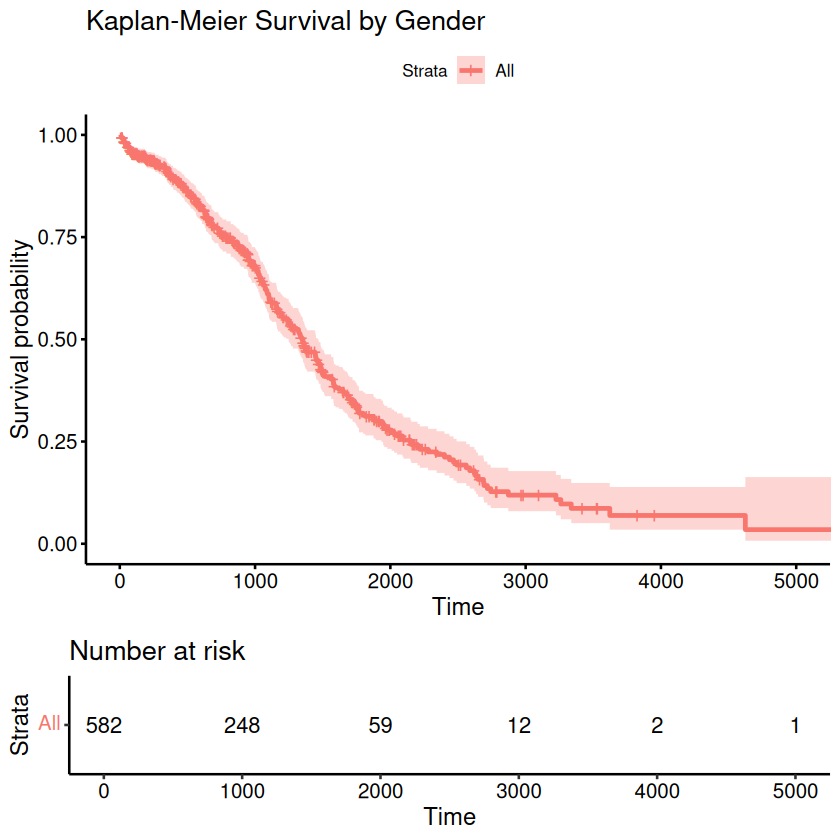


  [Discrepancy] [Not Available]      TUMOR FREE      WITH TUMOR 
              1              66             145             370 

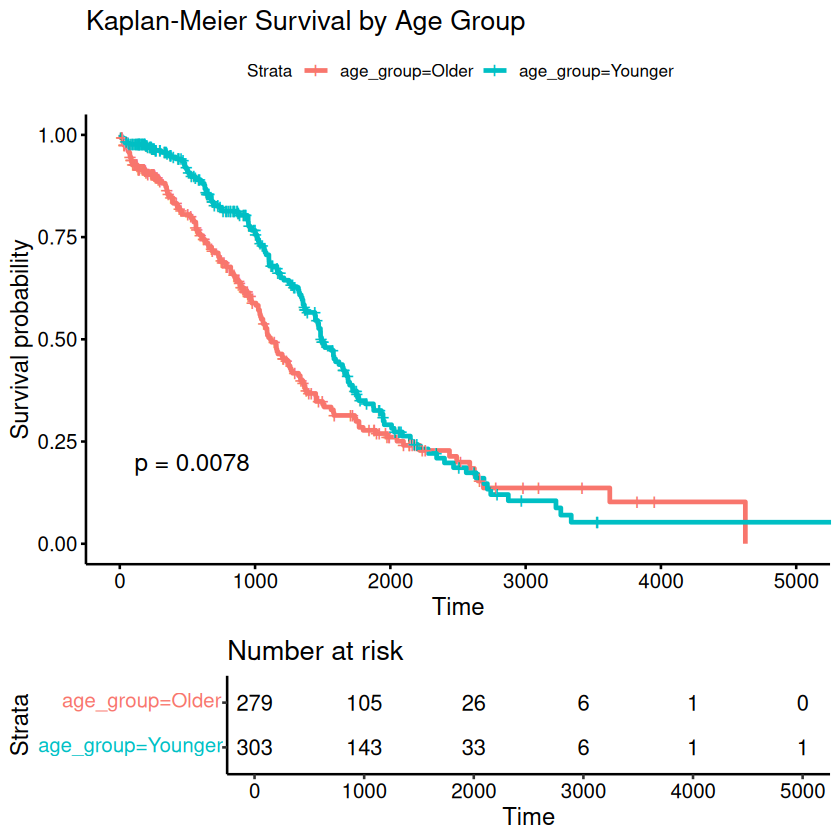

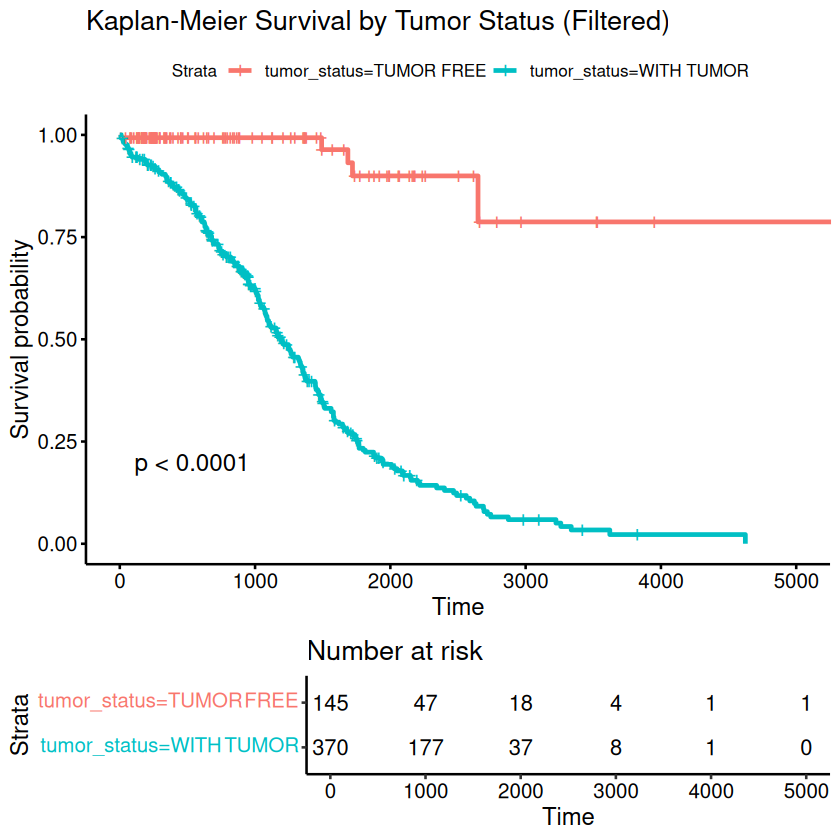

In [10]:
# Clean and prepare data using actual column names
clin.OV <- clin.OV %>%
  filter(!is.na(gender), !is.na(vital_status)) %>%
  mutate(
    gender = as.character(gender),
    age = as.numeric(age_at_initial_pathologic_diagnosis),
    days_to_death = as.numeric(death_days_to),
    days_to_last_followup = as.numeric(last_contact_days_to),
    vital_status_bin = ifelse(vital_status == "Dead", 1, 0),
    time = ifelse(is.na(days_to_death), days_to_last_followup, days_to_death)
  ) %>%
  filter(!is.na(time), time > 0)

# Optional: Create age groups (you can change median to another cutoff)
clin.OV <- clin.OV %>%
            mutate(age_group = ifelse(age > median(age, na.rm = TRUE), "Older", "Younger"))

# Step 4: Kaplan-Meier plots

# 4.1 Survival by Gender
fit_gender <- survfit(Surv(time, vital_status_bin) ~ gender, data = clin.OV)
ggsurvplot(fit_gender, data = clin.OV, pval = TRUE, risk.table = TRUE,
           title = "Kaplan-Meier Survival by Gender")

# 4.2 Survival by Age Group
fit_age <- survfit(Surv(time, vital_status_bin) ~ age_group, data = clin.OV)
ggsurvplot(fit_age, data = clin.OV, pval = TRUE, risk.table = TRUE,
           title = "Kaplan-Meier Survival by Age Group")

# 4.3 Survival by Tumor Status (if available)

table(clin.OV$tumor_status)

# 4.3 Survival by Tumor Status (if available)
if ("tumor_status" %in% colnames(clin.OV)) {
  clin.OV <- clin.OV %>%
    filter(tumor_status %in% c("TUMOR FREE", "WITH TUMOR"))
  
  fit_tumor <- survfit(Surv(time, vital_status_bin) ~ tumor_status, data = clin.OV)
  
  ggsurvplot(fit_tumor, data = clin.OV, pval = TRUE, risk.table = TRUE,
             title = "Kaplan-Meier Survival by Tumor Status (Filtered)")
}

In [11]:
head(clin.OV, 3)

bcr_patient_uuid,bcr_patient_barcode,form_completion_date,prospective_collection,retrospective_collection,gender,birth_days_to,race,ethnicity,jewish_religion_heritage_indicator,⋯,stage_other,system_version,tissue_source_site,tumor_tissue_site,age,days_to_death,days_to_last_followup,vital_status_bin,time,age_group
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
6d10d4ee-6331-4bba-93bc-a7b64cc0b22a,TCGA-04-1331,2009-3-26,[Not Available],[Not Available],FEMALE,-28848,WHITE,NOT HISPANIC OR LATINO,[Not Available],⋯,[Not Available],[Not Available],04,Ovary,78,1336,1224,1,1336,Older
b46263ab-c3ca-4fda-a895-74c7e6e6fe22,TCGA-04-1332,2009-3-26,[Not Available],[Not Available],FEMALE,-25786,WHITE,NOT HISPANIC OR LATINO,[Not Available],⋯,[Not Available],[Not Available],04,Ovary,70,1247,1247,1,1247,Older
ab3dbbbe-eed6-4a35-a505-1815225e86c9,TCGA-04-1335,2009-3-26,[Not Available],[Not Available],FEMALE,-21963,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,[Not Available],⋯,[Not Available],[Not Available],04,Ovary,60,55,NA,1,55,Older


In [12]:
print("Survival analysis")

[1] "Survival analysis"


In [13]:
print("Query and download gene expression data")

[1] "Query and download gene expression data"


In [14]:
# Step 1: Query RNA-seq gene expression (HTSeq - FPKM)
query_exp <- GDCquery(
  project = "TCGA-OV",
  data.category = "Transcriptome Profiling",
  data.type = "Gene Expression Quantification",
  workflow.type = "STAR - Counts"
)

# Step 2: Download the data
GDCdownload(query_exp)

# Step 3: Prepare the expression matrix (SummarizedExperiment object)
OV_se <- GDCprepare(query_exp)

# Step 4: Extract expression matrix
OV_rnaseq <- assay(OV_se)  # rows = genes, columns = samples

# Optional: log2 transform the matrix (add pseudocount to avoid log(0))
OV_rnaseq <- log2(OV_rnaseq + 1)

head(OV_rnaseq, 2)

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-OV

Warning message in open.connection(con, "rb"):
“URL 'https://api.gdc.cancer.gov/files/?pretty=true&expand=cases,cases.samples.portions.analytes.aliquots,cases.project,center,analysis,cases.samples&size=2556&filters=%7B%22op%22:%22and%22,%22content%22:[%7B%22op%22:%22in%22,%22content%22:%7B%22field%22:%22cases.project.project_id%22,%22value%22:[%22TCGA-OV%22]%7D%7D,%7B%22op%22:%22in%22,%22content%22:%7B%22field%22:%22files.data_category%22,%22value%22:[%22Transcriptome%20Profiling%22]%7D%7D,%7B%22op%22:%22in%22,%22content%22:%7B%22field%22:%22files.data_type%22,%22value%22:[%22Gene%20Expression%20Quantification%22]%7D%7D,%7B%22op%22:%22in%22,%22content%22:%7B%22field%22:%22files.analysi

|====================================================|100%                      Completed after 15 s 


Starting to add information to samples

 => Add clinical information to samples

 => Adding TCGA molecular information from marker papers

 => Information will have prefix 'paper_' 

Available assays in SummarizedExperiment : 
  => unstranded
  => stranded_first
  => stranded_second
  => tpm_unstrand
  => fpkm_unstrand
  => fpkm_uq_unstrand



,TCGA-24-2280-01A-01R-1568-13,TCGA-29-1710-01A-02R-1567-13,TCGA-61-2095-01A-01R-1568-13,TCGA-23-1023-01A-02R-1564-13,TCGA-23-1023-01R-01R-1564-13,TCGA-29-1770-02A-01R-1567-13,TCGA-29-1770-01A-01R-1567-13,TCGA-61-1721-01A-01R-1569-13,TCGA-04-1364-01A-01R-1565-13,TCGA-29-2414-01A-02R-1569-13,⋯,TCGA-23-1032-01A-02R-1564-13,TCGA-23-1026-01B-01R-1569-13,TCGA-24-1843-01A-01R-1567-13,TCGA-59-2354-01A-01R-1569-13,TCGA-23-2077-01A-01R-1568-13,TCGA-13-1407-01A-01R-1565-13,TCGA-23-1120-01A-02R-1565-13,TCGA-13-1496-01A-01R-1565-13,TCGA-04-1357-01A-01R-1565-13,TCGA-57-1584-01A-01R-1566-13
ENSG00000000003.15,11.742309,11.646109,12.212496,12.35066,13.611371,11.399812,12.262682,12.127350,12.325024,11.582612,⋯,13.138912,11.24258,12.15893,12.58238,12.661555,13.727282,12.27845,10.548822,11.05731,12.522827
ENSG00000000005.6,4.459432,2.807355,2.584963,4.70044,3.459432,2.584963,3.459432,9.885696,2.584963,2.584963,⋯,2.584963,0.00000,0.00000,4.00000,3.584963,3.584963,3.00000,4.392317,2.00000,3.169925


In [15]:
# Save after first run
saveRDS(OV_se, file = "OV_se.rds")

# Later: load it directly
# OV_se <- readRDS("OV_se.rds")
# OV_rnaseq <- assay(OV_se)

In [16]:
str(OV_se)

Formal class 'RangedSummarizedExperiment' [package "SummarizedExperiment"] with 6 slots
  ..@ rowRanges      :Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  .. .. ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. .. .. ..@ values         : Factor w/ 25 levels "chr1","chr2",..: 23 20 1 6 1 23 6 3 7 12 ...
  .. .. .. .. ..@ lengths        : int [1:43986] 2 1 4 3 2 1 1 1 4 1 ...
  .. .. .. .. ..@ elementMetadata: NULL
  .. .. .. .. ..@ metadata       : list()
  .. .. ..@ ranges         :Formal class 'IRanges' [package "IRanges"] with 6 slots
  .. .. .. .. ..@ start          : int [1:60660] 100627108 100584936 50934867 169849631 169662007 27612064 196652043 143494812 53497341 41072945 ...
  .. .. .. .. ..@ width          : int [1:60660] 12884 14950 23689 44637 192074 23122 95462 16909 119630 27032 ...
  .. .. .. .. ..@ NAMES          : chr [1:60660] "ENSG00000000003.15" "ENSG00000000005.6" "ENSG00000000419.13" "ENSG00000000457.14" ...
  .. .

In [17]:
slotNames(OV_se)       # shows S4 slots (e.g., "assays", "colData", "rowRanges", etc.)

[1] "rowRanges"       "colData"         "assays"          "NAMES"          
[5] "elementMetadata" "metadata"

In [18]:
OV_se

class: RangedSummarizedExperiment 
dim: 60660 429 
metadata(1): data_release
assays(6): unstranded stranded_first ... fpkm_unstrand fpkm_uq_unstrand
rownames(60660): ENSG00000000003.15 ENSG00000000005.6 ...
  ENSG00000288674.1 ENSG00000288675.1
rowData names(10): source type ... hgnc_id havana_gene
colnames(429): TCGA-24-2280-01A-01R-1568-13
  TCGA-29-1710-01A-02R-1567-13 ... TCGA-04-1357-01A-01R-1565-13
  TCGA-57-1584-01A-01R-1566-13
colData names(71): barcode patient ... figo_staging_edition_year
  sample.aux

In [19]:
colData(OV_se)

DataFrame with 429 rows and 71 columns
                                            barcode      patient
                                        <character>  <character>
TCGA-24-2280-01A-01R-1568-13 TCGA-24-2280-01A-01R.. TCGA-24-2280
TCGA-29-1710-01A-02R-1567-13 TCGA-29-1710-01A-02R.. TCGA-29-1710
TCGA-61-2095-01A-01R-1568-13 TCGA-61-2095-01A-01R.. TCGA-61-2095
TCGA-23-1023-01A-02R-1564-13 TCGA-23-1023-01A-02R.. TCGA-23-1023
TCGA-23-1023-01R-01R-1564-13 TCGA-23-1023-01R-01R.. TCGA-23-1023
...                                             ...          ...
TCGA-13-1407-01A-01R-1565-13 TCGA-13-1407-01A-01R.. TCGA-13-1407
TCGA-23-1120-01A-02R-1565-13 TCGA-23-1120-01A-02R.. TCGA-23-1120
TCGA-13-1496-01A-01R-1565-13 TCGA-13-1496-01A-01R.. TCGA-13-1496
TCGA-04-1357-01A-01R-1565-13 TCGA-04-1357-01A-01R.. TCGA-04-1357
TCGA-57-1584-01A-01R-1566-13 TCGA-57-1584-01A-01R.. TCGA-57-1584
                                       sample shortLetterCode
                                  <character>     <cha

In [20]:
rowData(OV_se)

DataFrame with 60660 rows and 10 columns
                     source     type     score     phase            gene_id
                   <factor> <factor> <numeric> <integer>        <character>
ENSG00000000003.15   HAVANA     gene        NA        NA ENSG00000000003.15
ENSG00000000005.6    HAVANA     gene        NA        NA  ENSG00000000005.6
ENSG00000000419.13   HAVANA     gene        NA        NA ENSG00000000419.13
ENSG00000000457.14   HAVANA     gene        NA        NA ENSG00000000457.14
ENSG00000000460.17   HAVANA     gene        NA        NA ENSG00000000460.17
...                     ...      ...       ...       ...                ...
ENSG00000288669.1    HAVANA     gene        NA        NA  ENSG00000288669.1
ENSG00000288670.1    HAVANA     gene        NA        NA  ENSG00000288670.1
ENSG00000288671.1    HAVANA     gene        NA        NA  ENSG00000288671.1
ENSG00000288674.1    HAVANA     gene        NA        NA  ENSG00000288674.1
ENSG00000288675.1    HAVANA     gene        NA 

In [21]:
colnames(OV_rnaseq) <- substr(colnames(OV_rnaseq), 1, 12)
dataOVcomplete <- log2(OV_rnaseq + 1)
colnames(clin.OV)
clinical_patient_Cancer = clin.OV

# Step 2: Optional — filter and create required survival fields
clinical_patient_Cancer <- clinical_patient_Cancer  %>%
  mutate(
    death_days_to = as.numeric(death_days_to),
    last_contact_days_to = as.numeric(last_contact_days_to),
    vital_status = as.character(vital_status),
    bcr_patient_barcode = as.character(bcr_patient_barcode),
    time = ifelse(is.na(death_days_to), last_contact_days_to, death_days_to),
    vital_status_bin = ifelse(vital_status == "Dead", 1, 0)
  ) %>%
  filter(!is.na(time), !is.na(vital_status_bin))

head(clinical_patient_Cancer, 2)
colnames(clinical_patient_Cancer)

[1] "bcr_patient_uuid"                    
 [2] "bcr_patient_barcode"                 
 [3] "form_completion_date"                
 [4] "prospective_collection"              
 [5] "retrospective_collection"            
 [6] "gender"                              
 [7] "birth_days_to"                       
 [8] "race"                                
 [9] "ethnicity"                           
[10] "jewish_religion_heritage_indicator"  
[11] "history_other_malignancy"            
[12] "history_neoadjuvant_treatment"       
[13] "initial_pathologic_dx_year"          
[14] "method_initial_path_dx"              
[15] "method_initial_path_dx_other"        
[16] "vital_status"                        
[17] "last_contact_days_to"                
[18] "death_days_to"                       
[19] "tumor_status"                        
[20] "tumor_grade"                         
[21] "residual_tumor"                      
[22] "residual_disease_largest_nodule"     
[23] "vascular_invasion_indicator"         
[24] "lymphovascular_invasion_indicator"   
[25] "karnofsky_score"                     
[26] "ecog_score"                          
[27] "performance_status_timing"           
[28] "radiation_treatment_adjuvant"        
[29] "pharmaceutical_tx_adjuvant"          
[30] "treatment_outcome_first_course"      
[31] "days_to_tumor_progression"           
[32] "new_tumor_event_dx_indicator"        
[33] "age_at_initial_pathologic_diagnosis" 
[34] "anatomic_neoplasm_subdivision"       
[35] "clinical_M"                          
[36] "clinical_N"                          
[37] "clinical_T"                          
[38] "clinical_stage"                      
[39] "days_to_initial_pathologic_diagnosis"
[40] "days_to_patient_progression_free"    
[41] "disease_code"                        
[42] "extranodal_involvement"              
[43] "histological_type"                   
[44] "icd_10"                              
[45] "icd_o_3_histology"                   
[46] "icd_o_3_site"                        
[47] "informed_consent_verified"           
[48] "pathologic_M"                        
[49] "pathologic_N"                        
[50] "pathologic_T"                        
[51] "pathologic_stage"                    
[52] "patient_id"                          
[53] "project_code"                        
[54] "stage_other"                         
[55] "system_version"                      
[56] "tissue_source_site"                  
[57] "tumor_tissue_site"                   
[58] "age"                                 
[59] "days_to_death"                       
[60] "days_to_last_followup"               
[61] "vital_status_bin"                    
[62] "time"                                
[63] "age_group"

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `death_days_to = as.numeric(death_days_to)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


bcr_patient_uuid,bcr_patient_barcode,form_completion_date,prospective_collection,retrospective_collection,gender,birth_days_to,race,ethnicity,jewish_religion_heritage_indicator,⋯,stage_other,system_version,tissue_source_site,tumor_tissue_site,age,days_to_death,days_to_last_followup,vital_status_bin,time,age_group
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
6d10d4ee-6331-4bba-93bc-a7b64cc0b22a,TCGA-04-1331,2009-3-26,[Not Available],[Not Available],FEMALE,-28848,WHITE,NOT HISPANIC OR LATINO,[Not Available],⋯,[Not Available],[Not Available],04,Ovary,78,1336,1224,1,1336,Older
b46263ab-c3ca-4fda-a895-74c7e6e6fe22,TCGA-04-1332,2009-3-26,[Not Available],[Not Available],FEMALE,-25786,WHITE,NOT HISPANIC OR LATINO,[Not Available],⋯,[Not Available],[Not Available],04,Ovary,70,1247,1247,1,1247,Older


[1] "bcr_patient_uuid"                    
 [2] "bcr_patient_barcode"                 
 [3] "form_completion_date"                
 [4] "prospective_collection"              
 [5] "retrospective_collection"            
 [6] "gender"                              
 [7] "birth_days_to"                       
 [8] "race"                                
 [9] "ethnicity"                           
[10] "jewish_religion_heritage_indicator"  
[11] "history_other_malignancy"            
[12] "history_neoadjuvant_treatment"       
[13] "initial_pathologic_dx_year"          
[14] "method_initial_path_dx"              
[15] "method_initial_path_dx_other"        
[16] "vital_status"                        
[17] "last_contact_days_to"                
[18] "death_days_to"                       
[19] "tumor_status"                        
[20] "tumor_grade"                         
[21] "residual_tumor"                      
[22] "residual_disease_largest_nodule"     
[23] "vascular_invasion_indicator"         
[24] "lymphovascular_invasion_indicator"   
[25] "karnofsky_score"                     
[26] "ecog_score"                          
[27] "performance_status_timing"           
[28] "radiation_treatment_adjuvant"        
[29] "pharmaceutical_tx_adjuvant"          
[30] "treatment_outcome_first_course"      
[31] "days_to_tumor_progression"           
[32] "new_tumor_event_dx_indicator"        
[33] "age_at_initial_pathologic_diagnosis" 
[34] "anatomic_neoplasm_subdivision"       
[35] "clinical_M"                          
[36] "clinical_N"                          
[37] "clinical_T"                          
[38] "clinical_stage"                      
[39] "days_to_initial_pathologic_diagnosis"
[40] "days_to_patient_progression_free"    
[41] "disease_code"                        
[42] "extranodal_involvement"              
[43] "histological_type"                   
[44] "icd_10"                              
[45] "icd_o_3_histology"                   
[46] "icd_o_3_site"                        
[47] "informed_consent_verified"           
[48] "pathologic_M"                        
[49] "pathologic_N"                        
[50] "pathologic_T"                        
[51] "pathologic_stage"                    
[52] "patient_id"                          
[53] "project_code"                        
[54] "stage_other"                         
[55] "system_version"                      
[56] "tissue_source_site"                  
[57] "tumor_tissue_site"                   
[58] "age"                                 
[59] "days_to_death"                       
[60] "days_to_last_followup"               
[61] "vital_status_bin"                    
[62] "time"                                
[63] "age_group"